<a href="https://colab.research.google.com/github/WetRavioli22/FastAi/blob/main/fast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 7.1MB/s 
     |████████████████████████████████| 204kB 13.7MB/s 
     |████████████████████████████████| 1.2MB 14.6MB/s 
     |████████████████████████████████| 51kB 7.0MB/s 
     |████████████████████████████████| 61kB 7.9MB/s 
     |████████████████████████████████| 61kB 8.2MB/s 
Mounted at /content/gdrive


In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [7]:
pip install jmd_imagescraper

In [8]:
from jmd_imagescraper.core import *
from pathlib import Path
from jmd_imagescraper.imagecleaner import *

In [9]:
food = ['noodles','burger']
path = Path().cwd()/"food"

In [10]:
duckduckgo_search(path,"noodles","noodles",max_results=100)

Duckduckgo search: noodles


[Path('/content/food/noodles/001_38aedb78.jpg'),
 Path('/content/food/noodles/002_baf87425.jpg'),
 Path('/content/food/noodles/003_c287c21d.jpg'),
 Path('/content/food/noodles/004_202adf7d.jpg'),
 Path('/content/food/noodles/005_423c9645.jpg'),
 Path('/content/food/noodles/006_4a200369.jpg'),
 Path('/content/food/noodles/007_b6e9c472.jpg'),
 Path('/content/food/noodles/008_52731108.jpg'),
 Path('/content/food/noodles/009_f7c0d9c6.jpg'),
 Path('/content/food/noodles/010_7456a579.jpg'),
 Path('/content/food/noodles/011_16fe9523.jpg'),
 Path('/content/food/noodles/012_4577a373.jpg'),
 Path('/content/food/noodles/013_78c3ccc7.jpg'),
 Path('/content/food/noodles/014_ab837c31.jpg'),
 Path('/content/food/noodles/015_64f31ac4.jpg'),
 Path('/content/food/noodles/016_bebc4c81.jpg'),
 Path('/content/food/noodles/017_afc1b878.jpg'),
 Path('/content/food/noodles/018_9535b191.jpg'),
 Path('/content/food/noodles/019_55e8b7eb.jpg'),
 Path('/content/food/noodles/020_4d557222.jpg'),
 Path('/content/food

In [11]:
duckduckgo_search(path,"burger","burger",max_results=100)

Duckduckgo search: burger


[Path('/content/food/burger/001_517d266e.jpg'),
 Path('/content/food/burger/002_40ddb23b.jpg'),
 Path('/content/food/burger/003_f200c167.jpg'),
 Path('/content/food/burger/004_32a68352.jpg'),
 Path('/content/food/burger/005_d97941a4.jpg'),
 Path('/content/food/burger/006_88151a82.jpg'),
 Path('/content/food/burger/007_796bdfb4.jpg'),
 Path('/content/food/burger/008_3cd10290.jpg'),
 Path('/content/food/burger/009_c73603ec.jpg'),
 Path('/content/food/burger/010_b2aa674b.jpg'),
 Path('/content/food/burger/011_1815fda5.jpg'),
 Path('/content/food/burger/012_0ae412c8.jpg'),
 Path('/content/food/burger/013_cee9d32a.jpg'),
 Path('/content/food/burger/014_efef682e.jpg'),
 Path('/content/food/burger/015_bf17fbc5.jpg'),
 Path('/content/food/burger/016_90909356.jpg'),
 Path('/content/food/burger/017_0d1d6f34.jpg'),
 Path('/content/food/burger/018_bbd2cc6a.jpg'),
 Path('/content/food/burger/019_62af8d08.jpg'),
 Path('/content/food/burger/020_5b3d5e8e.jpg'),
 Path('/content/food/burger/021_fa1cb5dd

In [12]:
fns = get_image_files(path)
fns

(#200) [Path('/content/food/noodles/001_38aedb78.jpg'),Path('/content/food/noodles/030_20abcb50.jpg'),Path('/content/food/noodles/081_227b4573.jpg'),Path('/content/food/noodles/096_9e1fd519.jpg'),Path('/content/food/noodles/016_bebc4c81.jpg'),Path('/content/food/noodles/047_294f69d8.jpg'),Path('/content/food/noodles/085_a804ff16.jpg'),Path('/content/food/noodles/049_c78ca17b.jpg'),Path('/content/food/noodles/069_6899d2b5.jpg'),Path('/content/food/noodles/026_b84401a8.jpg')...]

In [13]:
failed = verify_images(fns)
failed

(#0) []

In [14]:
failed.map(Path.unlink);

In [15]:
display_image_cleaner(path)

HTML(value='<h2>No images left to display in this folder.</h2>', layout=Layout(visibility='hidden'))

GridBox(children=(VBox(children=(Image(value=b'', layout="Layout(width='150px')"), Button(description='Delete'…

In [16]:
food = DataBlock(blocks=(ImageBlock,CategoryBlock),get_items=get_image_files,splitter=RandomSplitter(valid_pct=0.2,seed=42),get_y=parent_label,item_tfms=RandomResizedCrop(224,min_scale=0.3),batch_tfms=aug_transforms())

In [17]:
dls = food.dataloaders(path)

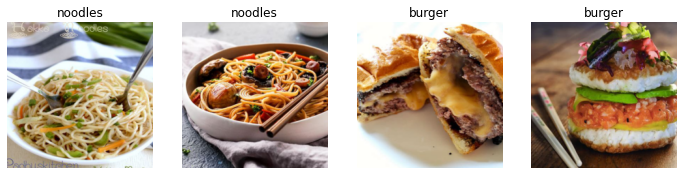

In [18]:
dls.valid.show_batch(max_n=4,nrows=1)

In [19]:
learn = cnn_learner(dls,resnet18,metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.464529,1.458904,0.461538,00:27


epoch,train_loss,valid_loss,error_rate,time
0,0.667726,0.732543,0.256410,00:41
1,0.506458,0.068455,0.025641,00:38
2,0.376591,0.011750,0.000000,00:37
3,0.290119,0.005543,0.000000,00:37


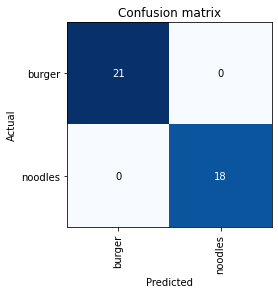

In [20]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [61]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [60]:
img = PILImage.create(btn_upload.data[-1])

IndexError: ignored

In [62]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl : display(img.to_thumb(128,128))
out_pl

Output()

In [63]:
pred,pred_idx,probs = learn.predict(img)
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:04f}'
lbl_pred

Label(value='Prediction: noodles; Probability: 0.998127')

In [28]:
learn.export()

In [29]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [34]:
learn_inf = load_learner(path/'export.pkl')

In [45]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [46]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [65]:
btn_upload = widgets.FileUpload()
VBox([widgets.Label('Choose da food'),btn_upload,btn_run,out_pl,lbl_pred])